In [286]:
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

### Question 1

In [342]:
def fun(x):
    
    if -np.pi<=x<=0:
        return 0
    elif 0<=x<=np.pi:
        return np.pi-x

In [343]:
def fourier(li, lf, n, f):
    l = (lf-li)/2
    # Constant term
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    # Cosine coefficents
    A = np.zeros((n))
    # Sine coefficents
    B = np.zeros((n))
     
    for i in range(1,n+1):
        A[i-1]=1/(2*l)*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]
        B[i-1]=1/(2*l)* integrate.quad(lambda x: f(x)*np.sin(i*np.pi*x/l), li, lf)[0]
 
    return [a0/2.0, A, B]

In [344]:
li=-np.pi
lf=np.pi
n=5

coeffs=fourier(li,lf,5,fun)

In [345]:
print(coeffs)

[0.7853981633974483, array([ 3.18309886e-01,  6.93889390e-17,  3.53677651e-02, -6.59194921e-17,
        1.27323954e-02]), array([0.5       , 0.25      , 0.16666667, 0.125     , 0.1       ])]


<ipython-input-297-afcfa3a99536>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ni,abs(coeffs[1]),'b')
<ipython-input-297-afcfa3a99536>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ni,abs(coeffs[2]),'r')


Text(0.5, 0, 'n')

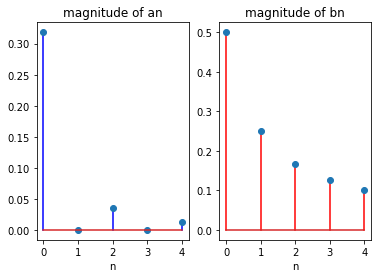

In [297]:
ni=np.arange(0,5)
plt.subplot(1,2,1)
plt.stem(ni,abs(coeffs[1]),'b')
plt.title("magnitude of an")
plt.xlabel("n")

plt.subplot(1,2,2)
plt.stem(ni,abs(coeffs[2]),'r')
plt.title("magnitude of bn")
plt.xlabel("n")


### Question 2

In [462]:
def sawtooth(x):
    
    if -1<=x<=0:
        return 2*x+1
    elif 0<=x<=1:
        return -2*x+1

In [467]:
def fourier(li,lf,n,f):
    
    l=(lf-li)
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    A=np.zeros((n))
    B=np.zeros((n))
    
    for i in range(1,n+1):
        A[i-1]=2/(l)*integrate.quad(lambda x: f(x)*np.cos(2*i*np.pi*x/l), li, lf)[0]
        B[i-1]=2/(l)* integrate.quad(lambda x: f(x)*np.sin(2*i*np.pi*x/l), li, lf)[0]
 
    return [a0/2,A,B]

<ipython-input-468-b97fe26db53a>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ni,abs(coeffs[1]),'b')
<ipython-input-468-b97fe26db53a>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ni,abs(coeffs[2]),'r')


Text(0.5, 0, 'n')

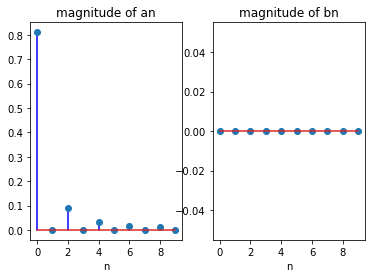

In [468]:
lf=1
li=-1

n=10
coeffs=fourier(li,lf,n,sawtooth)
# print(coeffs)
ni=np.arange(0,10,1)
plt.subplot(1,2,1)
plt.stem(ni,abs(coeffs[1]),'b')
plt.title("magnitude of an")
plt.xlabel("n")


plt.subplot(1,2,2)
plt.stem(ni,abs(coeffs[2]),'r')
plt.title("magnitude of bn")
plt.xlabel("n")



In [483]:
def f(s,x,n,li,lf):
    l=(lf-li)
    z=0
    for i in range(0,n+1):
       
        if i==0:
            z=z+s[0]
        else:
            z=z+(s[1][i-1]*np.cos(2*np.pi*i*x/l))+(s[2][i-1]*np.sin(2*np.pi*i*x/l))
            
    return z

Text(0.5, 1.0, 'fourier series of sawtooth')

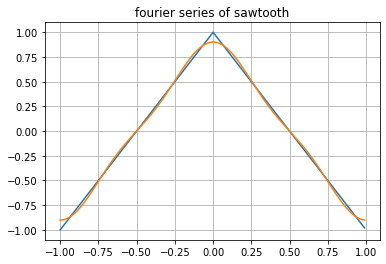

In [486]:
x=np.arange(-1,1,0.01)
y=[]
for i in range(len(x)):
    y.append(sawtooth(x[i]))
plt.plot(x,y)
plt.grid()

plt.plot(x,f(coeffs,x,3,-1,1))
plt.title("fourier series of sawtooth")

Text(0.5, 1.0, 'fourier series of sawtooth')

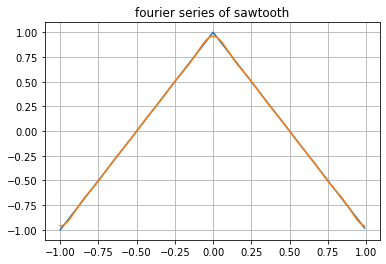

In [487]:
x=np.arange(-1,1,0.01)
y=[]
for i in range(len(x)):
    y.append(sawtooth(x[i]))
plt.plot(x,y)
plt.grid()

plt.plot(x,f(coeffs,x,9,-1,1))
plt.title("fourier series of sawtooth")

### Question 3

In [348]:
from scipy.integrate import quad
from scipy.fft import fft

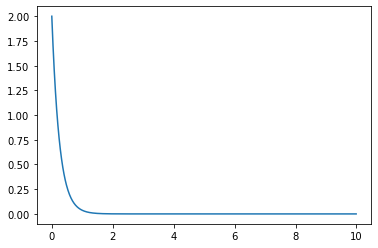

In [349]:
def fun(A,a):
    
    t=np.arange(0,10,0.01)
    L=[]
    for i in t:
        L.append(A*np.exp(-a*t))
    return np.array(L)

y=np.array(fun(2,4))
ti=np.arange(0,10,0.01)
plt.plot(ti,y[0])



In [350]:
def x1_realpart(t,A,a,w):
    if (t>0):
        return A*np.exp(-a*t)*np.cos(w*t)
    else:
        return 0

In [351]:
def x1_realpart_int(A,a,w,ll,ul):
    I = quad(x1_real,ll,ul,args=(A,a,w))
    return I[0]

In [352]:
def x1_imagpart(t,A,a,w):
    if (t>0):
        return A*np.exp(-a*t)*np.sin(w*t)
    else:
        return 0

In [353]:
def x1_imag_int(A,a,w,ll,ul):
    I = quad(x1_imag,ll,ul,args=(A,a,w))
    return I[0]

In [354]:
A = 2
a = 4
ll = 0
ul = np.inf
w = np.arange(-40,40,0.01)
x1_Real = []
x1_Imag = []
for i in w:
    x1_Real.append(x1_realpart_int(A,a,i,ll,ul))
    x1_Imag.append(x1_imag_int(A,a,i,ll,ul))

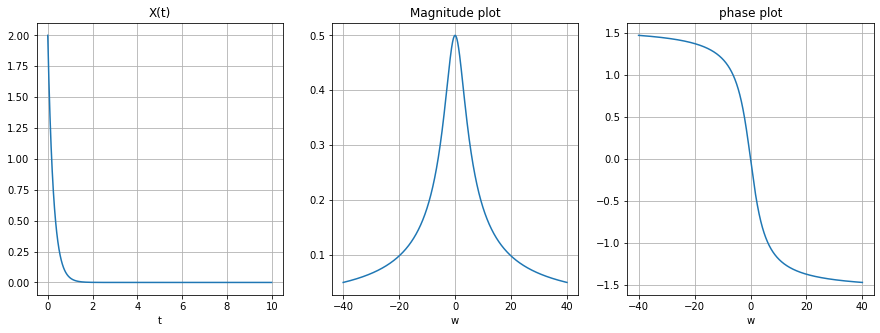

In [355]:
t=np.arange(0,10,0.01)
y=np.array(fun(2,4))

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(t,y[0])
plt.title("X(t)")
plt.xlabel("t")
plt.grid()

x1_mag = np.absolute((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
plt.subplot(1,3,2)
plt.plot(w,x1_mag)
plt.title("Magnitude plot")
plt.xlabel("w")
plt.grid()


x1_phase = np.angle((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
plt.subplot(1,3,3)
plt.plot(w,x1_phase)
plt.title("phase plot")
plt.xlabel("w")
plt.grid()

### b

In [145]:
def fun_b(t,A,a):
    
    return A*np.exp(-a*np.abs(t))

In [146]:
def x2_realpart(t,A,a,w):
    f = A*np.exp(-a*abs(t))*np.cos(w*t)
    return f

In [147]:
def x2_realpart_int(A,a,w,ll,ul):
    I = quad(x2_real,ll,ul,args=(A,a,w))
    return I[0]

In [148]:
def x2_imagpart(t,A,a,w):
    f = A*np.exp(-a*abs(t))*np.sin(w*t)
    return f

In [149]:
def x2_imagpart_int(A,a,w,ll,ul):
    I = quad(x2_imag,ll,ul,args=(A,a,w))
    return I[0]

In [150]:
A = 2
a = 4
ll = -np.inf
ul = np.inf
w = np.arange(-10,10,0.01)
x2_Real = []
x2_Imag = []
for i in w:
    x2_Real.append(x2_realpart_int(A,a,i,ll,ul))
    x2_Imag.append(x2_imagpart_int(A,a,i,ll,ul))

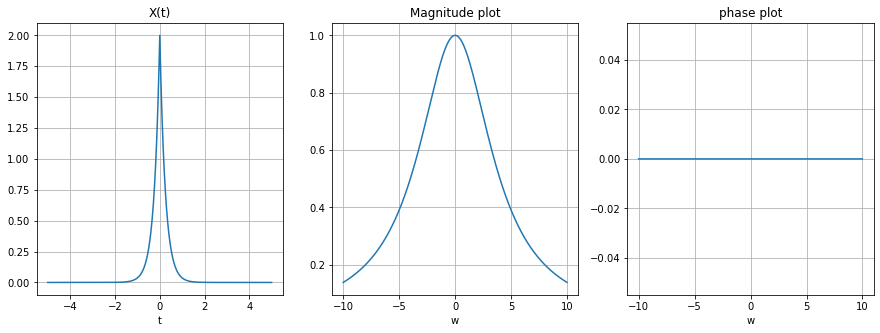

In [151]:
ti=np.arange(-5,5,0.01)
L=fun_b(ti,2,4)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(ti,L)
plt.title("X(t)")
plt.xlabel("t")
plt.grid()

x2_mag = np.absolute((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
plt.subplot(1,3,2)
plt.plot(w,x2_mag)
plt.title("Magnitude plot")
plt.xlabel("w")
plt.grid()


x2_phase = np.angle((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
plt.subplot(1,3,3)
plt.plot(w,x2_phase)
plt.title("phase plot")
plt.xlabel("w")
plt.grid()

### Question 4

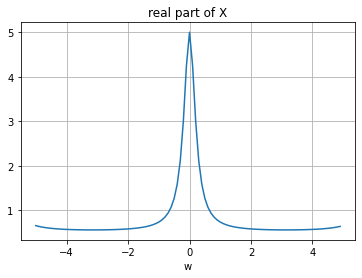

In [356]:
def X_r_w(a,w):
    
    num=1-a*np.cos(w)
    den=(1-a*np.cos(w))**2+(a*np.sin(w))**2
    
    return num/den

w=np.arange(-5,5,0.1)
R=X_r_w(0.8,w)
plt.plot(w,R)
plt.title("real part of X")
plt.xlabel("w")
plt.grid()

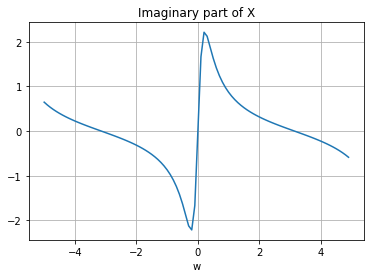

In [357]:
def X_i_w(a,w):
    
    num=a*np.sin(w)
    den=(1-a*np.cos(w))**2+(a*np.sin(w))**2
    
    return num/den

w=np.arange(-5,5,0.1)
I=X_i_w(0.8,w)
plt.plot(w,I)
plt.title("Imaginary part of X")
plt.xlabel("w")
plt.grid()

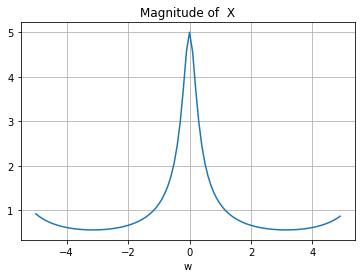

In [321]:
def X_mag(a,w):
    num=1
    den=np.sqrt((1-a*np.cos(w))**2+((a*np.sin(w))**2))
    
    return num/den

w=np.arange(-5,5,0.1)
X_Magnitude=X_mag(0.8,w)
plt.plot(w,X_Magnitude)
plt.title("Magnitude of  X")
plt.xlabel("w")
plt.grid()

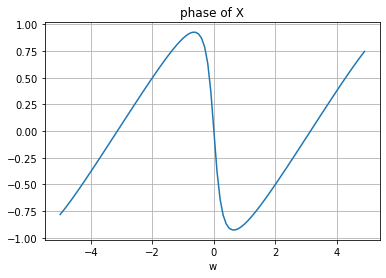

In [322]:
def X_phase(a,w):
    num=a*np.sin(w)
    den=(1-a*np.cos(w))
    
    return np.arctan(-num/den)

w=np.arange(-5,5,0.1)
phase=X_phase(0.8,w)
plt.plot(w,phase)
plt.title("phase of X")
plt.xlabel("w")
plt.grid()

### Question 5

<ipython-input-409-70847c4892db>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,L)


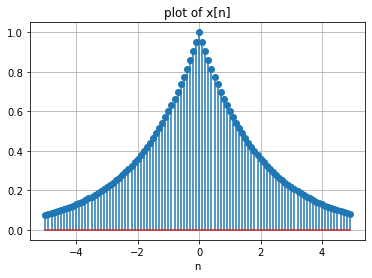

In [409]:
def fun(a,n):
    
    return a**(np.abs(n))
 
n=np.arange(-5,5,0.1)
L=fun(0.6,n)
plt.stem(n,L)
plt.title("plot of x[n]")
plt.xlabel("n")
plt.grid()

<ipython-input-411-c61d98a202c2>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(w,X)
C:\Users\Sujan\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


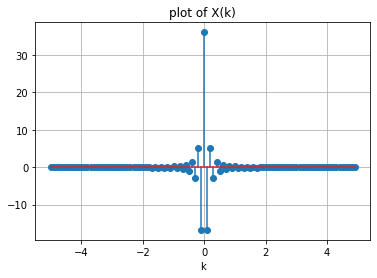

In [411]:
w=np.fft.fftfreq(100,d=0.1)
X=sp.fft.fft(fun(0.6,n))
plt.stem(w,X)
plt.title("plot of X(k)")
plt.xlabel("k")
plt.grid()



### Question 6

<ipython-input-377-64262340385c>:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,x4,'b')


Text(0.5, 0, 'n')

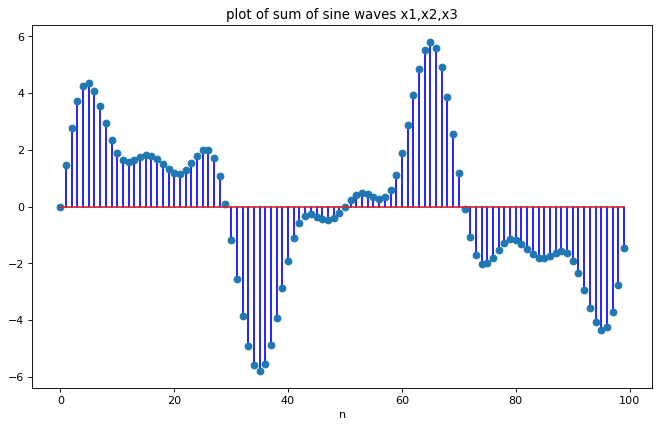

In [377]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


N=100
T=0.01
A1=3
phi=0
f1 = 2           
n = np.arange(N)    
x1 = A1*np.sin(2*np.pi*n*f1*T+phi) 
X1 = fft(x1)

N=100
T=0.01
A2=2
phi=0
f2 =5          
# n = np.arange(N)    
x2 = A2*np.sin(2*np.pi*n*f2*T+phi) 
X2 = fft(x2)

N=100
T=0.01
A3=1
phi=0
f3 =8           
# n = np.arange(N)    
x3 = A3*np.sin(2*np.pi*n*f3*T+phi) 
X3 = fft(x3)


figure(figsize=(10, 6), dpi=80)
# plt.plot(n,x1,color="red")
# plt.plot(n,x2,color="green")
# plt.plot(n,x3,color="blue")

x4=x1+x2+x3
plt.stem(n,x4,'b')
plt.title("plot of sum of sine waves x1,x2,x3")
plt.xlabel("n")


In [390]:
def DFT(x):
    N = len(x)
    out = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        out.append(dft)
    return out

In [393]:
d=DFT(x4)
d_abs = np.absolute(d)

<ipython-input-394-8ed457448ac7>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,d_abs)


<StemContainer object of 3 artists>

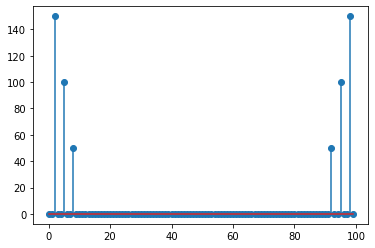

In [394]:
plt.stem(n,d_abs)

In [400]:
def Filter(x,fs):
    fill = [] 
    for i in range(len(x)):
        if i<=fs:
            fill.append(x[i])
    return fill

In [403]:
fill_out=(Filter(d_abs,100/2))

<ipython-input-407-6ded3f95ff35>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ni,fill_out)


Text(0.5, 0, 'k')

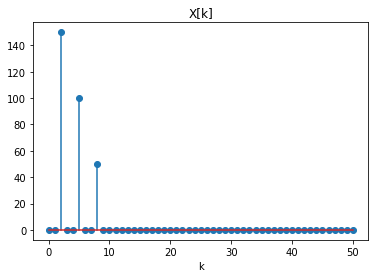

In [407]:
ni=np.arange(0,51,1)
plt.stem(ni,fill_out)
plt.title("X[k]")
plt.xlabel("k")

### Question 7

In [415]:
import numpy as np

from numpy.fft import fft
import matplotlib.pyplot as plt

N=1
T=0.005
A=1

f=100
n=np.arange(0,N,T)
x=A*np.sin(2*np.pi*f*T*n)
X=np.fft.fft(x)


In [424]:
# print(x)

Text(0, 0.5, 'Amplitude')

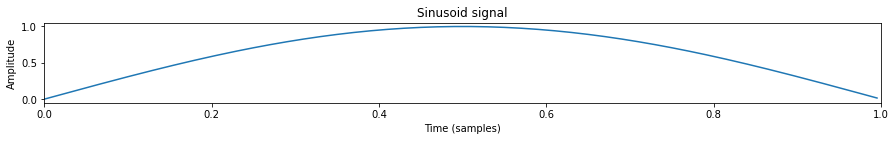

In [417]:
plt.figure(figsize=(15,5))
plt.subplot(3,1,1)     
   
plt.plot(n,x) 
plt.xlim(0,N)
plt.title('Sinusoid signal')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')


In [418]:
magX = abs(np.array(X))
print(len(magX))

200


<ipython-input-419-725fb07ad17a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ni,magX)


Text(0, 0.5, 'Magnitude (Linear)')

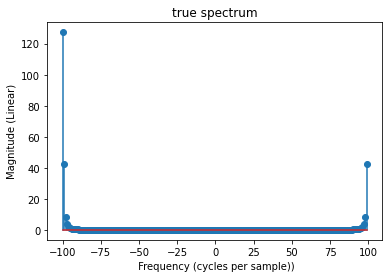

In [419]:
ni=np.arange(-100,100,1)
plt.stem(ni,magX)
plt.title("true spectrum")
plt.xlabel(' Frequency (cycles per sample))') 
plt.ylabel('Magnitude (Linear)')

In [425]:
p=np.arange(-100,100,1)
y=np.zeros(len(p))
def win(t):
    for i in range(len(p)):
        if p[i]<=(-t) or np.abs(p[i])>=(t):
            y[i]=0
        else:
            y[i]=1
    return np.array(y)
win1=win(40)        
win2=win(80)        

<ipython-input-426-1fef52fe6c4e>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(p,win1)
<ipython-input-426-1fef52fe6c4e>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(p,np.absolute(np.fft.fft(win1)))
<ipython-input-426-1fef52fe6c4e>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new b

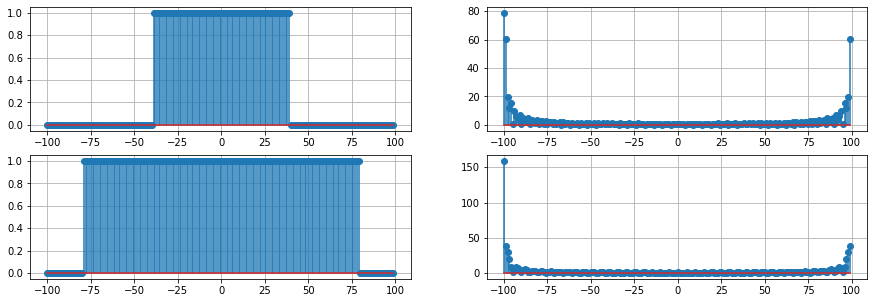

In [426]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
plt.stem(p,win1)
plt.grid()

plt.subplot(2,2,2)
plt.stem(p,np.absolute(np.fft.fft(win1)))
plt.grid()

plt.subplot(2,2,3)
plt.stem(p,win2)
plt.grid()

plt.subplot(2,2,4)
plt.stem(p,np.absolute((np.fft.fft(win2))))
plt.grid()

<ipython-input-488-810c630fe78e>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(p,np.abs(np.fft.fft(m)))
<ipython-input-488-810c630fe78e>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(p,np.array((np.fft.fft(m))).imag/np.array(np.fft.fft(m)).real)


Text(0.5, 1.0, 'phase spectrum')

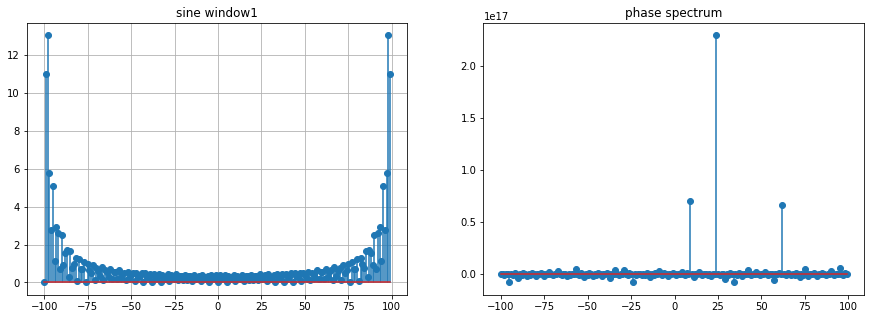

In [488]:
m=x*win1

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.stem(p,np.abs(np.fft.fft(m)))
plt.title("sine window1")
plt.grid()

plt.subplot(1,2,2)
plt.stem(p,np.array((np.fft.fft(m))).imag/np.array(np.fft.fft(m)).real)
plt.title("phase spectrum")


<ipython-input-489-e56a2117c997>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(p,np.abs(np.fft.fft(m)))
<ipython-input-489-e56a2117c997>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(p,np.array((np.fft.fft(m))).imag/np.array(np.fft.fft(m)).real)


Text(0.5, 1.0, 'phase spectrum')

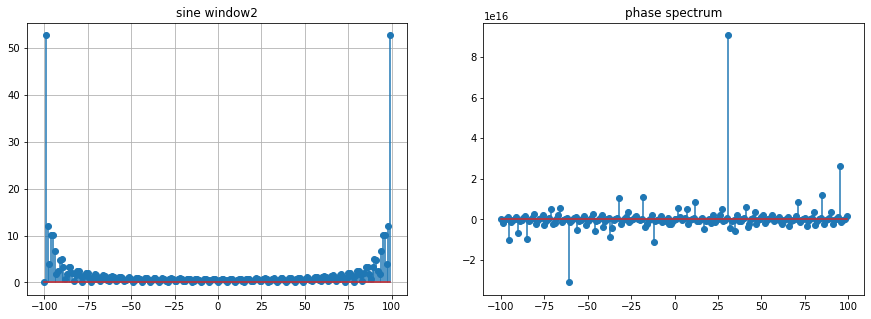

In [489]:
m=x*win2

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.stem(p,np.abs(np.fft.fft(m)))
plt.title("sine window2")
plt.grid()


plt.subplot(1,2,2)
plt.stem(p,np.array((np.fft.fft(m))).imag/np.array(np.fft.fft(m)).real)
plt.title("phase spectrum")
